<a href="https://colab.research.google.com/github/ATX24/FFPredictor/blob/main/Fantasy_Football_DataScience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phase One
Goal: Use multiple linear regression to find the fantasy points of a player based on current stats

In [ ]:
#Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:
import pandas as pd
listOfData = [];
for x in range(70,99):
  test = pd.read_csv('19' + str(x) + '.csv')
  listOfData.append(pd.DataFrame(test))
for i in range(0,9):
  test2 = pd.read_csv('200' + str(i) + '.csv')
  listOfData.append(pd.DataFrame(test2))
for i in range(11, 19):
  test3 = pd.read_csv('20' + str(i) + '.csv')
  listOfData.append(pd.DataFrame(test3))

listOfData[0]

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Ron Johnson,NYG,RB,23.0,14.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1027.0,8.0,263.0,487.0,4.0,261.40
1,1,Dick Gordon,CHI,WR,26.0,14.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17.0,0.0,4.0,1026.0,13.0,249.30
2,2,Gene Washington,SFO,WR,23.0,13.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100.0,12.0,235.00
3,3,Gary Garrison,SDG,WR,26.0,14.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,4.0,1006.0,12.0,217.30
4,4,MacArthur Lane,STL,RB,28.0,14.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,977.0,11.0,206.0,365.0,2.0,240.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,Harry Wilson,PHI,0,26.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
380,380,Paul Zaeske,HOU,0,25.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
381,381,Ken Brown,CLE,RB,25.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-8.0,0.0,1.0,0.0,0.0,-0.80
382,382,John Huarte,KAN,QB,27.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.00


In [ ]:
from functools import reduce
final_df = reduce(lambda  left,right: pd.merge(left,right,
                                            how='outer'), listOfData)

In [ ]:
# Exploring final_df

test = list(final_df['FantasyPoints'])
max = 0
value = 0
for i in range(len(test)):
  if test[i] > max:
    max = test[i];
    value = i
print(max)
test1 = list(final_df['Player'])
print(test1[value])

481.1
LaDainian Tomlinson


In [ ]:
final_df.columns.values.tolist()

['Unnamed: 0',
 'Player',
 'Tm',
 'Pos',
 'Age',
 'G',
 'GS',
 'Cmp',
 'Att',
 'Yds',
 'Int',
 'Att.1',
 'Yds.1',
 'Rec',
 'Yds.2',
 'Y/R',
 'Fumbles',
 'FumblesLost',
 'PassingYds',
 'PassingTD',
 'PassingAtt',
 'RushingYds',
 'RushingTD',
 'RushingAtt',
 'ReceivingYds',
 'ReceivingTD',
 'FantasyPoints',
 'Tgt']

In [ ]:
#Filter data


pos = input('Position: ')
posList = final_df['Pos']
for x in range(len(posList)):
  if(posList[x] != pos):
    final_df = final_df.drop(index = x)



Position: RB


In [ ]:
final_df.dropna

<bound method DataFrame.dropna of        Unnamed: 0               Player   Tm Pos   Age     G    GS  Cmp  Att  \
0               0          Ron Johnson  NYG  RB  23.0  14.0  14.0  0.0  0.0   
4               4       MacArthur Lane  STL  RB  28.0  14.0  14.0  0.0  0.0   
9               9          Larry Brown  WAS  RB  23.0  13.0  13.0  0.0  0.0   
13             13          Ken Willard  SFO  RB  27.0  14.0  14.0  0.0  0.0   
14             14             Bo Scott  CLE  RB  27.0  13.0  13.0  0.0  0.0   
...           ...                  ...  ...  ..   ...   ...   ...  ...  ...   
23711         534           Derek Watt  LAC  RB  26.0  16.0   5.0  0.0  0.0   
23743         566  De'Angelo Henderson  NYJ  RB  26.0   3.0   0.0  0.0  0.0   
23780         603         Danny Vitale  GNB  RB  25.0   5.0   0.0  0.0  0.0   
23786         609    Jonathan Williams  NOR  RB  24.0   3.0   0.0  0.0  0.0   
23793         616        Robert Turbin  IND  RB  29.0   2.0   0.0  0.0  0.0   

       Yds  ...  

In [ ]:
x = final_df[[       
              'Age',
              'Rec',           
              'Y/R',
              'Fumbles',
              'FumblesLost',
              'RushingYds',
              'RushingTD',
              'RushingAtt',
              'ReceivingYds',
              'ReceivingTD',
               ]]

y = final_df[['FantasyPoints']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
model = LinearRegression(fit_intercept = True, normalize = True)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
prediction = model.predict(X_train)
print('Our multiple linear model had an R^2 of: %0.3f'%model.score(X_train, y_train))

Our multiple linear model had an R^2 of: 0.236


In [ ]:
11
print(X_train)
testData = pd.DataFrame(columns = ['Age', 'Rec', 'Y/R', 'Fumbles', 'FumblesLost', 'RushingYds', 'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD'])

age = input('Age: ')

rec = input('Rec: ')
yr = input('Y/R: ')
fumbles = input('Fumbles: ')
fumblesLost = input('Fumbles lost: ')
rushingYds = input('Rushing yards: ')
RushingTD = input('Rushing TDs: ')
rushingAtt = input('Rushing Attempts: ')
receivingYds = input('Receiving yards: ')
receivingTds = input('Receiving Touchdowns: ')

rec = [age, rec, yr, fumbles, fumblesLost, rushingYds, RushingTD, rushingAtt, receivingTds, receivingTds]
testData.loc[len(testData)+1] = rec

        Age   Rec    Y/R  Fumbles  FumblesLost  RushingYds  RushingTD  \
13925  26.0  16.0   8.00      2.0          1.0         9.0        0.0   
16506  28.0  15.0   5.20      5.0          1.0      1880.0       27.0   
1563   26.0  46.0   7.22      6.0          0.0       561.0        2.0   
14345  33.0  17.0   4.00      1.0          1.0       658.0        3.0   
5780   25.0   1.0  19.00      1.0          0.0        98.0        1.0   
...     ...   ...    ...      ...          ...         ...        ...   
1602   31.0  29.0   6.76      1.0          0.0       514.0        4.0   
18458  25.0  29.0   8.79      0.0          0.0       187.0        1.0   
3709   23.0  54.0   8.00      6.0          0.0       500.0        8.0   
4214   25.0  43.0   8.05      4.0          0.0       359.0        3.0   
15800  23.0   3.0   4.33      0.0          0.0         9.0        0.0   

       RushingAtt  ReceivingYds  ReceivingTD  
13925         2.0         128.0          2.0  
16506       370.0          78

In [ ]:
model.predict(testData)

array([[11.82050833]])

#Phase 2
Goal: Create a Dataset with yearly stats and future points

In [ ]:
#Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import r2_score


In [ ]:
dataset = pd.DataFrame({'Name':['test']*18090, 'Age':[1]*18090, 'Yards':[1]*18090, 'Receptions':[1]*18090, 'Season':[1]*18090})

In [ ]:
ind = 0
tester = True

#Iterates through all the datasets
for i in range(1970,2017):
  testData = pd.read_csv(str(i) + '.csv')
  futureData = pd.read_csv(str(i+1) + '.csv')

  testData = pd.DataFrame(testData)
  futureData = pd.DataFrame(futureData)


  #Iterates through test data (current data)
  for x in range(0, len(testData)): 
    #Gets the player from the current year
    player1 = testData['Player'][x]
    #Iterates through the future data (next year)
    for i in range(0, len(futureData)): 
      #Gets the player from the next year
      player2 = futureData['Player'][i]
      #Checks to see if player1 played both years
      if (player1 == player2): 
        #Adds correct values to the dataset
        dataset.loc[ind, "Name"] = testData['Player'][x]
        dataset.loc[ind, "Age"] = futureData['Age'][i]
        dataset.loc[ind, "Yards"] = testData['ReceivingYds'][x]
        dataset.loc[ind, "Receptions"] = testData['Rec'][x]
        #1 is a good season
        #0 is a bad season
        if (futureData['FantasyPoints'][i] > 180): 
          dataset.loc[ind, "Season"] = 1
        else:
          dataset.loc[ind, "Season"] = 0

        ind = ind +1

In [ ]:
dataset.head()

,Name,Age,Yards,Receptions,Season
0,Ron Johnson,24,487,48,0
1,Dick Gordon,27,1026,71,0
2,Gene Washington,24,1100,53,0
3,Gene Washington,27,1100,53,0
4,Gary Garrison,27,1006,44,0


In [ ]:
x = dataset[[       
              'Age',
              'Yards',           
              'Receptions',
               ]]

y = dataset[['Season']]

#Phase 3
Build a machine learning model to compute phase 2 data
Try logistical analysis

In [ ]:
#Reclassify points
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logModel.predict(x)

In [ ]:
len(y_pred)

18090

In [ ]:
acc = accuracy_score(y, y_pred)
print(acc)

0.8598673300165838


In [ ]:
import numpy as np
print(X_train)
test = pd.DataFrame({'Age': [21], 'Yards': [1500], 'Receptions': [87]})
logModel.predict(test)


       Age  Yards  Receptions
8007    34    244          25
9623    25    124           7
15621   28     82          14
11316   24      5           1
973     24    196          26
...    ...    ...         ...
5695    27      0           0
8006    29    239          24
17745   31   1005          56
17931   33     83           8
13151   28    699          77

[12663 rows x 3 columns]


array([0])

Text(0.5, 257.44, 'Predicted season')

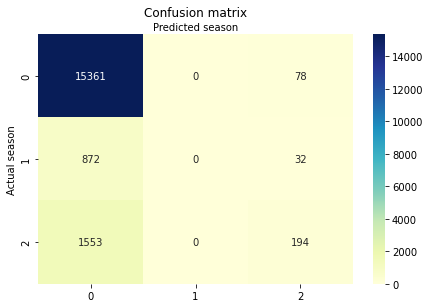

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual season')
plt.xlabel('Predicted season')